# Data wrangling WeRateDogs  

#### by Qing Zhao

### Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
  - [Quality](#quality)
  - [Tidiness](#tidy)

- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing](#visual)
  - [Insight one & visualization](#insight1)
  - [Insight two & visualization](#insight2)
  - [Insight three & visualization](#insight3)



<a id='intro'></a>
### Introduction
The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.   


<a id='gather'></a>
### Gathering Data
1. Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

#### 1. Twitter archive file

In [1]:
#import all the packages needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy 
import json

In [2]:
# import the twitter-archive-enhanced CSV file into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# Check to see if the file was imported correctly
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image prediction

In [3]:
# use requests to get the image_predictions.tsv from the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# open the image_predictions.tsv file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
#import image_predictions.tsv file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API & JSON

In [5]:
#create an API object that you can use to gather Twitter data
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
#http://docs.tweepy.org/en/v3.2.0/api.html#API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,  parser = tweepy.parsers.JSONParser())

In [6]:
# create a list to store the downloaded Tweepy status object based on Tweet ID
list_of_tweets = []
# Getting tweet JSON data via tweet ID using Tweepy
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id, tweet_mode='extended'))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 418
Rate limit reached. Sleeping for: 738


In [7]:
# the number of tweets found 
len(list_of_tweets)

2331

In [8]:
#https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
#Writing JSON to a File
with open('tweet_json.txt', 'w') as f:
    for tweet in list_of_tweets:
        temp = json.dumps(tweet)
        f.write(temp+'\n')

In [4]:
# read tweets data into a dictionary
tweets_data = []
with open('tweet_json.txt', 'r') as f:
    for tweet in f:
        temp = json.loads(tweet)
        tweets_data.append({'tweet_id': temp['id'],
                            'favorite_count': temp['favorite_count'],
                            'retweet_count': temp['retweet_count']
                           })
#get the first element
tweets_data[0]

{'tweet_id': 892420643555336193,
 'favorite_count': 36426,
 'retweet_count': 7747}

In [5]:
# change the dictionary into the dataframe
twitter_data = pd.DataFrame(tweets_data)
twitter_data.head()

,favorite_count,retweet_count,tweet_id
0,36426,7747,892420643555336193
1,31395,5740,892177421306343426
2,23651,3799,891815181378084864
3,39760,7913,891689557279858688
4,37966,8540,891327558926688256


<a id='assess'></a>
### Assessing Data
#### 1. Visual assessment
Each table of gathered data is displayed below seperately for visual assessment purposes.

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
twitter_data

,favorite_count,retweet_count,tweet_id
0,36426,7747,892420643555336193
1,31395,5740,892177421306343426
2,23651,3799,891815181378084864
3,39760,7913,891689557279858688
4,37966,8540,891327558926688256
5,19107,2858,891087950875897856
6,11131,1866,890971913173991426
7,61431,17296,890729181411237888
8,26311,3939,890609185150312448
9,30073,6737,890240255349198849


#### Programmatic assessment

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#check the missing values for expanded_urls
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
#check the duplicates in tweet_id
twitter_archive.tweet_id.duplicated().sum()

0

In [12]:
#check the rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# when checking the rating_numerator in the original sourse file, I found that the rating_numerator in text column could be float and not equal to the number in the rating_numerator column
# filter the column text with regex to show the incorrect rating_numerator
filter_condition = twitter_archive.text.str.contains('\d+?\.\d+?\/10')
filter_df = twitter_archive[filter_condition][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
pd.set_option('display.max_colwidth', -1)
filter_df

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [14]:
#check the rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
#check the rating_denominator that not equal to 10
a = twitter_archive[twitter_archive['rating_denominator']!= 10]
a[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [16]:
#check the name of the dog
twitter_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Tucker       10 
Penny        10 
Lola         10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
Toby         7  
Bailey       7  
Daisy        7  
Buddy        7  
an           7  
Bella        6  
Oscar        6  
Scout        6  
Stanley      6  
Jack         6  
Rusty        6  
Milo         6  
Dave         6  
Jax          6  
Leo          6  
Koda         6  
Phil         5  
            ..  
Julio        1  
Stephanus    1  
Jeb          1  
Clifford     1  
Julius       1  
Yukon        1  
Antony       1  
Patch        1  
Severus      1  
Baron        1  
Reptar       1  
Pilot        1  
Bodie        1  
Puff         1  
Ulysses      1  
Iroh         1  
Bloo         1  
Sweets       1  
Amélie       1  
Rizzo        1  
Lupe         1  
Lugan        1  
Sully        1  
Norman       1  
Strudel      1  
Tonks        1  
Arlen        1  
Bones        1

In [17]:
# retweeted tweets
retweeted = twitter_archive[twitter_archive.retweeted_status_id.notnull()]
retweeted
#181 entries had been retweeted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#check the duplicates in tweet_id
image_prediction.tweet_id.duplicated().sum()

0

In [20]:
#check the duplicates in jpg_url
image_prediction.jpg_url.duplicated().sum()

66

In [21]:
#check the number of image
image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [22]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
Shetland_sheepdog            18 
Maltese_dog                  18 
Eskimo_dog                   18 
teddy                        18 
beagle                       18 
Shih-Tzu                     17 
Lakeland_terrier             17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

In [23]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Pembroke                          27 
Eskimo_dog                        27 
collie                            27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
Samoyed                           20 
malinois                          20 
chow                              20 
toy_terrier                       20 
miniature_pinscher                20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [24]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [25]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [26]:
#descriptive statistics of twitter_data
twitter_data.describe()

,favorite_count,retweet_count,tweet_id
count,2331.000000,2331.000000,2.331000e+03
mean,7613.957958,2721.932218,7.419079e+17
std,11813.403624,4604.015448,6.823170e+16
min,0.000000,1.000000,6.660209e+17
25%,1329.000000,549.500000,6.782670e+17
50%,3314.000000,1278.000000,7.182469e+17
75%,9337.000000,3160.000000,7.986692e+17
max,157447.000000,78374.000000,8.924206e+17


In [27]:
#check the duplicates in tweet_id
twitter_data.tweet_id.duplicated().sum()

0

<a id='quality'></a>
#### Quality issues
1. twitter_archive  

  - erroneous data type('tweet_id'should be object not int, 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id ' and 'retweeted_status_user_id'should be object not the float, 'timestamp'and 'retweeted_status_timestamp 'should be datetime not the object)   
  - missing values in expanded_urls     
  - incorrect rating_numerators (only take the number behind the decimal point of the original data in text column)
  - 23 wrong rating_denominator that not equal to 10  
  - 745 dogs named none   
  - some entries are retweets  
  - some entries are wrong named(not the name in text)   
  
  
2. image_prediction   

  - erroneous data type('tweet_id'should be object not int)   
  - the duplicates in jpg_url(66)  
  - inconsistant upper case value in p1, p2, p3   
  - missing data (only has 2075 entries instead of 2356   
  
  
3. twitter_data   

  - erroneous data type('tweet_id'should be object not int)   
  - missing data (only has 2331 entries instead of 2356)

<a id='tidy'></a>
#### Tidiness issues    
Three data frames twitter_archive, image_predictions, and twitter_data should be one (combined table) since all tables' entries are each describing one tweet

1. twitter_archive    
  
  - one variable in four columns (doggo, floofer, pupper, and puppo)   
  - retweeted data not the original  
  
2. image_prediction   

  - Create 1 column for image prediction and 1 column for confidence level


<a id='clean'></a>
### Cleaning Data

In [28]:
# make copies for three dataframe
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_data_clean = twitter_data.copy()

#### twitter_archive
1. erroneous data type('tweet_id'should be object not int, 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id ' and 'retweeted_status_user_id'should be object not the float, 'timestamp'and 'retweeted_status_timestamp 'should be datetime not the object)  

##### Define   
Convert the data type for 'tweet_id','in_reply_to_status_id', 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id ' and 'retweeted_status_user_id' into string, convert 'timestamp'and 'retweeted_status_timestamp' to datetime.   

##### Code

In [29]:
# to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)

In [30]:
#to datatime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

##### Test

In [31]:
# confirm the changed datatypes
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

In [32]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
882,760290219849637889,nan,nan,2016-08-02 01:44:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv,nan,nan,NaT,https://twitter.com/dog_rates/status/760290219849637889/video/1,13,10,Rocco,None,None,None,None
1118,732005617171337216,nan,nan,2016-05-16 00:31:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Larry. He has no self control. Tongue still nifty af tho 11/10 https://t.co/ghyT4Ubk1r,nan,nan,NaT,"https://twitter.com/dog_rates/status/732005617171337216/photo/1,https://twitter.com/dog_rates/status/732005617171337216/photo/1",11,10,Larry,None,None,None,None
708,785264754247995392,nan,nan,2016-10-09 23:44:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He requested to be carried around like that. 12/10 anything for Doc https://t.co/mWYACm4qnx,nan,nan,NaT,https://twitter.com/dog_rates/status/785264754247995392/photo/1,12,10,Doc,None,None,None,None
1069,740365076218183684,nan,nan,2016-06-08 02:09:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,nan,nan,NaT,https://twitter.com/dog_rates/status/740365076218183684/photo/1,10,10,None,None,None,None,None
109,871166179821445120,nan,nan,2017-06-04 00:46:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…,8.41077006473e+17,4196983835.0,2017-03-13 00:02:39,https://twitter.com/dog_rates/status/841077006473256960/photo/1,12,10,Dawn,None,None,None,None


2. missing values in expanded_urls
##### Define    

    - Those missing values in expanded_urls column are the tweets without photos or videos, just a simple post.When I check the definition of the expanded url on twitter, it says that those urls are the automatically expands shortened URLs that are included in the body of a Tweet, and includes the resulting URL as metadata within the payload.(https://developer.twitter.com/en/docs/tweets/enrichments/overview/expanded-and-enhanced-urls)

    - So this doesn't affect the rate but have a impact on the following image prediction, maybe that's the reason why we have missing entries in the image_prediction dataset.

In [33]:
# check the tweet_id of those missing values in expanded_url
twitter_archive_clean.expanded_urls.isnull().sum()

59

In [34]:
#get the tweet_id of those missing values
miss_expanded_url = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].tweet_id
miss_expanded_url

30      886267009285017600
55      881633300179243008
64      879674319642796034
113     870726314365509632
148     863427515083354112
179     857214891891077121
185     856330835276025856
186     856288084350160898
188     855862651834028034
189     855860136149123072
218     850333567704068097
228     848213670039564288
234     847617282490613760
274     840698636975636481
290     838150277551247360
291     838085839343206401
313     835246439529840640
342     832088576586297345
346     831926988323639298
375     828361771580813312
387     826598799820865537
409     823333489516937216
427     821153421864615936
498     813130366689148928
513     811647686436880384
570     801854953262350336
576     800859414831898624
611     797165961484890113
701     786051337297522688
707     785515384317313025
843     766714921925144576
857     763956972077010945
967     750381685133418496
1005    747651430853525504
1080    738891149612572673
1295    707983188426153984
1345    704491224099647488
1

3. incorrect rating_numerators (only take the number behind the decimal point of the original data in text column)
##### Define   
    - convert the data type of rating_numerators from int to float
    - Using str.extract()to get the right numerators by regex and put into the corresponding rating_numerators   

##### Code

In [35]:
# extract numerator from text when denominator is 10 and assign it to new column called rating_numerator_new
# there are some other fraction type data in the text, which may be extracted before as the rate. So we only 
#extract the fractions that the denominators are 10 to be the denominators of the rate 
twitter_archive_clean['rating_numerator_new'] = twitter_archive_clean.text.str.extract(r'(\d+?\.?\d*?)\/10',expand=False)
#convert the data type of rating_numerator_new into float
twitter_archive_clean['rating_numerator_new'] = twitter_archive_clean.rating_numerator_new.astype(float)

##### Test

In [36]:
# confirm the change of the datatype
twitter_archive_clean.rating_numerator_new.dtypes

dtype('float64')

In [37]:
# check the int and float extracted
twitter_archive_clean.rating_numerator_new.value_counts(dropna=False)
#the nan value is the denominator that not equal to 10

 12.00      558
 11.00      464
 10.00      462
 13.00      353
 9.00       157
 8.00       102
 14.00      56 
 7.00       54 
 5.00       35 
 6.00       32 
 3.00       19 
NaN         16 
 4.00       15 
 2.00       9  
 1.00       8  
 9.75       2  
 0.00       2  
 15.00      2  
 420.00     2  
 17.00      1  
 13.50      1  
 11.26      1  
 666.00     1  
 11.27      1  
 1776.00    1  
 9.50       1  
 182.00     1  
Name: rating_numerator_new, dtype: int64

In [38]:
#check the number of the extracted values
len(twitter_archive_clean.rating_numerator_new)

2356

4. wrong rating_denominators that not equal to 10
##### Define   
    - drop the entries which the denominator is not 10(we already got them in extracting the numerator above), since the standard rate denominator is 10 according to the project motivation  
    - create the new rate_denominator column which all elements equal to 10   

##### Code

In [39]:
# drop NAN in rating_numerator_new
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
twitter_archive_clean = twitter_archive_clean.dropna(subset=['rating_numerator_new'])
#create the new column called rating_denominator_new
#https://stackoverflow.com/questions/44657226/how-to-insert-a-new-column-with-repeated-values-into-a-pandas-table
twitter_archive_clean = twitter_archive_clean.assign(rating_denominator_new = 10)

##### Test

In [40]:
#confirm the existence of the new column rating_numerator_new and its datatype
print(twitter_archive_clean.head())
twitter_archive_clean.rating_denominator_new.dtypes

             tweet_id in_reply_to_status_id in_reply_to_user_id  \
0  892420643555336193  nan                   nan                  
1  892177421306343426  nan                   nan                  
2  891815181378084864  nan                   nan                  
3  891689557279858688  nan                   nan                  
4  891327558926688256  nan                   nan                  

            timestamp  \
0 2017-08-01 16:23:56   
1 2017-08-01 00:17:27   
2 2017-07-31 00:18:03   
3 2017-07-30 15:58:51   
4 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4

dtype('int64')

5.some entries are retweets
##### Define   
- filter the original tweets (no retweeted_staus)  

##### Code

In [41]:
#when retweeted the tweet, it will recorded in the retweeted_status. Otherwise, it will be recorded as nan in retweeted_status
#https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
twitter_archive_clean_noretweet = twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id']== 'nan']

##### Test

In [42]:
#check the retweeted_status_user_id values, should have all NaN
sum(twitter_archive_clean_noretweet['retweeted_status_user_id']!= 'nan')

0

In [43]:
twitter_archive_clean_noretweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2159 non-null object
in_reply_to_status_id         2159 non-null object
in_reply_to_user_id           2159 non-null object
timestamp                     2159 non-null datetime64[ns]
source                        2159 non-null object
text                          2159 non-null object
retweeted_status_id           2159 non-null object
retweeted_status_user_id      2159 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2104 non-null object
rating_numerator              2159 non-null int64
rating_denominator            2159 non-null int64
name                          2159 non-null object
doggo                         2159 non-null object
floofer                       2159 non-null object
pupper                        2159 non-null object
puppo                         2159 non-null object
rating_numerato

6. tidiness: one variable in four columns (doggo, floofer, pupper, and puppo)   

##### Define   

  - Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value ('None' if no dog stage given). Also record if there are multiple dog stages, separating by a comma.   
  
##### Code

In [44]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean_noretweet['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    dog_stage = []
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

twitter_archive_clean_noretweet
# Apply to each row
twitter_archive_clean_noretweet = twitter_archive_clean_noretweet.apply(get_dog_stage, axis=1)

# Drop the redundant columns
twitter_archive_clean_noretweet = twitter_archive_clean_noretweet.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

In [45]:
# check the new column of dog_stage
twitter_archive_clean_noretweet.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage
1889,674774481756377088,nan,nan,2015-12-10 02:15:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Superpup. His head isn't proportional to his body. Has yet to serve any justice. 11/10 maybe one day pupper https://t.co/gxIFgg8ktm,nan,nan,NaT,https://twitter.com/dog_rates/status/674774481756377088/photo/1,11,10,Superpup,11.0,10,pupper
2284,667192066997374976,nan,nan,2015-11-19 04:05:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*takes several long deep breaths* omg omg oMG OMG OMG OMGSJYBSNDUYWJO 12/10 https://t.co/QCugm5ydl6,nan,nan,NaT,https://twitter.com/dog_rates/status/667192066997374976/photo/1,12,10,None,12.0,10,None
607,798209839306514432,nan,nan,2016-11-14 17:03:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10 https://t.co/jG1PAFkB81,nan,nan,NaT,https://twitter.com/dog_rates/status/798209839306514432/photo/1,13,10,Cooper,13.0,10,None
1639,684177701129875456,nan,nan,2016-01-05 01:00:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7,nan,nan,NaT,https://twitter.com/dog_rates/status/684177701129875456/photo/1,10,10,Kulet,10.0,10,None
1721,680130881361686529,nan,nan,2015-12-24 21:00:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reggie. His Santa hat is a little big. 10/10 he's still having fun https://t.co/w0dcGXq7qK,nan,nan,NaT,https://twitter.com/dog_rates/status/680130881361686529/photo/1,10,10,Reggie,10.0,10,None


#### image_prediction

1. erroneous data type('tweet_id'should be object not int)   

##### Define    
   - convert the datatype into string   
   
##### Code

In [46]:
#to string
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

##### Test

In [47]:
#check the datatype
image_prediction_clean.tweet_id.dtypes
# dtype('O') means python object

dtype('O')

2. duplicated jpg_url   

##### Define    
   - check the duplicates and why they are same from one and another

##### Code

In [48]:
#check the all duplicates
image_prediction_clean[image_prediction.jpg_url.duplicated(False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


By checking the tweet_id and jpg_url, we found the duplicates are the retweets for those original tweets. Howerer, when we merge the three tables together, those retweeted id will not be save in the new dataset.We could not deleted them for now, otherwise we may deleted the ids of original tweets.

3. inconsistant upper case value in p1, p2, p3   

##### Define   

   - change the value of p1, p2, p3 all into lower case   
   
##### Code

In [49]:
# convert the p1, p2, p3 values into lower case
image_prediction_clean.p1 = image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 = image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 = image_prediction_clean.p3.str.lower()

##### Test

In [50]:
image_prediction_clean.p1.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                     89 
chihuahua                    83 
pug                          57 
chow                         44 
samoyed                      43 
toy_poodle                   39 
pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
french_bulldog               26 
miniature_pinscher           23 
chesapeake_bay_retriever     23 
seat_belt                    22 
siberian_husky               20 
staffordshire_bullterrier    20 
german_shepherd              20 
web_site                     19 
cardigan                     19 
shetland_sheepdog            18 
maltese_dog                  18 
beagle                       18 
teddy                        18 
eskimo_dog                   18 
lakeland_terrier             17 
rottweiler                   17 
shih-tzu                     17 
italian_greyhound            16 
kuvasz                       16 
          

In [51]:
image_prediction_clean.p2.value_counts()

labrador_retriever                104
golden_retriever                  92 
cardigan                          74 
chihuahua                         44 
pomeranian                        42 
chesapeake_bay_retriever          41 
french_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
siberian_husky                    33 
beagle                            28 
pembroke                          27 
eskimo_dog                        27 
collie                            27 
kuvasz                            26 
italian_greyhound                 22 
pekinese                          21 
american_staffordshire_terrier    21 
malinois                          20 
toy_terrier                       20 
chow                              20 
samoyed                           20 
miniature_pinscher                20 
norwegian_elkhound                19 
boston_bull                       19 
staffordshir

In [52]:
image_prediction_clean.p3.value_counts()

labrador_retriever                79
chihuahua                         58
golden_retriever                  48
eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
pekinese                          29
toy_poodle                        29
pomeranian                        29
pembroke                          27
chesapeake_bay_retriever          27
great_pyrenees                    27
french_bulldog                    26
malamute                          26
american_staffordshire_terrier    24
pug                               23
cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
siberian_husky                    19
shetland_sheepdog                 17
boston_bull                       17
l

**twitter_data**

erroneous data type('tweet_id'should be object not int)   

##### Define    

   - convert the datatype from int to string   
   
##### Code

In [53]:
#to string
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype(str)

##### Test

In [54]:
# confirm the datatype now is object
twitter_data_clean.tweet_id.dtypes

dtype('O')

**image_prediction**

Tidiness: create 1 column for image prediction and 1 column for confidence level   

##### Define     

   - Create a function where I keep the first true prediction along the confidence level as new columns.   
   
   - drop the old detailed columns
   
##### Code 

In [55]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_breed = []
confidence_level = []

#create a function to capture the dog breed and confidence level from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_breed.append(image_prediction_clean['p1'])
        confidence_level.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_breed.append(image_prediction_clean['p2'])
        confidence_level.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_breed.append(image_prediction_clean['p3'])
        confidence_level.append(image_prediction_clean['p3_conf'])
    else:
        dog_breed.append('nan')
        confidence_level.append('nan')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_breed'] = dog_breed
image_prediction_clean['confidence_level'] = confidence_level

In [56]:
#drop the p1, p2, p3 and related columns for prediction
image_prediction_clean = image_prediction_clean.drop(['p1','p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 'p2_dog', 
                                                      'p3', 'p3_conf', 'p3_dog'], axis=1)

##### Test

In [57]:
# check the new columns for dog_breed and confidence_level
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
dog_breed           2075 non-null object
confidence_level    2075 non-null object
dtypes: int64(1), object(4)
memory usage: 81.1+ KB


In [58]:
#convert the datatype of confidence_level into float
image_prediction_clean['confidence_level'] = image_prediction_clean['confidence_level'].astype(float)
#confirm the datatype
image_prediction_clean.confidence_level.dtypes

dtype('float64')

##### Tidiness issues    

Three data frames twitter_archive, image_predictions, and twitter_data should be one (combined table) since all tables' entries are each describing one tweet   

##### Define   

   - merge all three tables together on 'tweet_id'   
   
##### Code  

In [59]:
#create a new dataframe that combine the twitter_archive, image_predictions
twitter_final_1 = pd.merge(twitter_archive_clean_noretweet, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])
# check the combined dataframe
twitter_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 20 columns):
tweet_id                      2159 non-null object
in_reply_to_status_id         2159 non-null object
in_reply_to_user_id           2159 non-null object
timestamp                     2159 non-null datetime64[ns]
source                        2159 non-null object
text                          2159 non-null object
retweeted_status_id           2159 non-null object
retweeted_status_user_id      2159 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2104 non-null object
rating_numerator              2159 non-null int64
rating_denominator            2159 non-null int64
name                          2159 non-null object
rating_numerator_new          2159 non-null float64
rating_denominator_new        2159 non-null int64
dog_stage                     2159 non-null object
jpg_url                       1981 non-null object
img_num        

In [60]:
#create a new dataframe that combine the twitter_final_1, twitter_data
twitter_final = pd.merge(twitter_final_1, 
                      twitter_data_clean, 
                      how = 'left', on = ['tweet_id'])
# check the combined dataframe
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 22 columns):
tweet_id                      2159 non-null object
in_reply_to_status_id         2159 non-null object
in_reply_to_user_id           2159 non-null object
timestamp                     2159 non-null datetime64[ns]
source                        2159 non-null object
text                          2159 non-null object
retweeted_status_id           2159 non-null object
retweeted_status_user_id      2159 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2104 non-null object
rating_numerator              2159 non-null int64
rating_denominator            2159 non-null int64
name                          2159 non-null object
rating_numerator_new          2159 non-null float64
rating_denominator_new        2159 non-null int64
dog_stage                     2159 non-null object
jpg_url                       1981 non-null object
img_num        

In [61]:
twitter_final

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,13.0,10,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,nan,NaN,36426.0,7747.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,13.0,10,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,31395.0,5740.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,12.0,10,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,23651.0,3799.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Darla,13.0,10,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,39760.0,7913.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,12.0,10,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,37966.0,8540.0
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,None,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,19107.0,2858.0
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Jax,13.0,10,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,11131.0,1866.0
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaT,"h

##### Tidiness   

non-useful columns need deleting
##### Define   

  - drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in twitter_final  
  
##### Code

In [62]:
twitter_final = twitter_final.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                        'retweeted_status_id','retweeted_status_user_id', 
                        'retweeted_status_timestamp'], axis=1) 
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 17 columns):
tweet_id                  2159 non-null object
timestamp                 2159 non-null datetime64[ns]
source                    2159 non-null object
text                      2159 non-null object
expanded_urls             2104 non-null object
rating_numerator          2159 non-null int64
rating_denominator        2159 non-null int64
name                      2159 non-null object
rating_numerator_new      2159 non-null float64
rating_denominator_new    2159 non-null int64
dog_stage                 2159 non-null object
jpg_url                   1981 non-null object
img_num                   1981 non-null float64
dog_breed                 1981 non-null object
confidence_level          1674 non-null float64
favorite_count            2152 non-null float64
retweet_count             2152 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 303.6+ KB


<a id='visual'></a>
### Storing, analyzing and visualization   

#### Storing   

   - store the final Dataframe into csv file in local folder

In [2]:
twitter_final.to_csv('twitter_archive_master.csv', index=False)

NameError: name 'twitter_final' is not defined

#### Analyzing and Visualization  

<a id='insight1'></a>
##### Insight1 : The breeds of all rated dogs

In [21]:
# import the dataset 
twitter_dog_rate = pd.read_csv('twitter_archive_master.csv')
twitter_dog_rate.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13.0,10,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,NaN,36426.0,7747.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,10,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,31395.0,5740.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,10,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,23651.0,3799.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,10,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,39760.0,7913.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,10,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,37966.0,8540.0


In [22]:
twitter_dog_rate.dog_breed.isnull().sum()
#we still miss some information about the breed information, we could recollect data on them to make the analysis more reliable

485

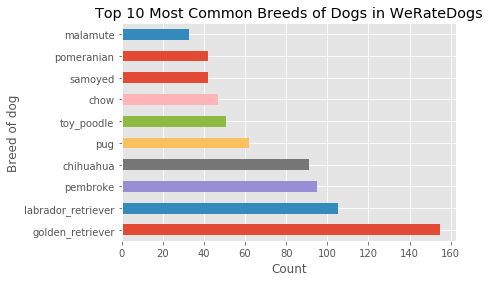

In [24]:
# the top 10 most common breeds of dogs that tweeted
twitter_dog_rate.dog_breed.value_counts()[:10].plot(kind = 'barh');
plt.title('Top 10 Most Common Breeds of Dogs in WeRateDogs')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Breed of dog', fontsize=12)
#https://stackoverflow.com/questions/15814635/prettier-default-plot-colors-in-matplotlib
plt.style.use('ggplot')
#save figure in local
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.savefig('Top 10 Most Common Breeds of Dogs.png',bbox_inches = "tight");

<a id='insight2'></a>
##### Insight2 : Popularity of breeds of all rated dogs

In [25]:
# Using favorite_count as the factor of popularity
pop_counts = twitter_dog_rate.groupby(['dog_breed']).sum()['favorite_count']
pop_counts.sort_values(ascending=False)[:10]

dog_breed
golden_retriever      1810580.0
labrador_retriever    1127717.0
pembroke               976922.0
chihuahua              725723.0
french_bulldog         565544.0
samoyed                520041.0
chow                   418296.0
cocker_spaniel         381751.0
pug                    352525.0
malamute               329525.0
Name: favorite_count, dtype: float64

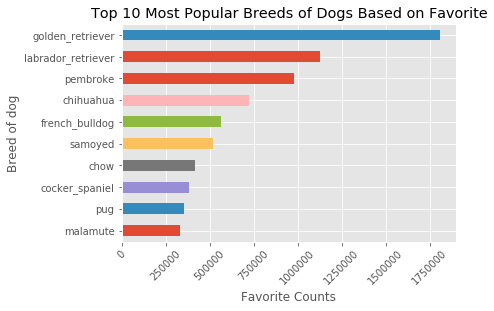

In [26]:
#the top 10 most popular breeds of rated dogs
pop_counts.sort_values(ascending=True)[-10:].plot(kind='barh');
plt.xticks(rotation=45)
plt.title('Top 10 Most Popular Breeds of Dogs Based on Favorite')
plt.xlabel('Favorite Counts', fontsize=12)
plt.ylabel('Breed of dog', fontsize=12)
#save figure in local
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.savefig('Top 10 Most Popular Breeds of Dogs Based on Favorite.png',bbox_inches = "tight");

In [27]:
# Using retweet_count as the factor of popularity
pop_counts_retweet = twitter_dog_rate.groupby(['dog_breed']).sum()['retweet_count']
pop_counts_retweet.sort_values(ascending=False)[:10]

dog_breed
golden_retriever      522950.0
labrador_retriever    346480.0
pembroke              260421.0
chihuahua             232940.0
samoyed               171450.0
french_bulldog        145037.0
cocker_spaniel        130939.0
chow                  117157.0
pug                   104233.0
pomeranian            101092.0
Name: retweet_count, dtype: float64

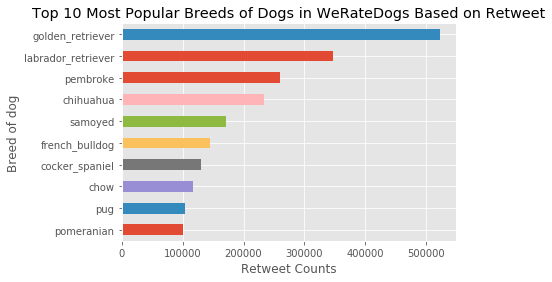

In [28]:
#the top 10 most popular breeds of rated dogs based on retweet_count
pop_counts_retweet.sort_values(ascending=True)[-10:].plot(kind='barh');
plt.title('Top 10 Most Popular Breeds of Dogs in WeRateDogs Based on Retweet')
plt.xlabel('Retweet Counts', fontsize=12)
plt.ylabel('Breed of dog', fontsize=12)
#save figure in local
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.savefig('Top 10 Most Popular Breeds of Dogs Based on Retweet.png',bbox_inches = "tight");

<a id='insight3'></a>
##### Insight3 : The relationship between Popularity and Rating of all rated dogs

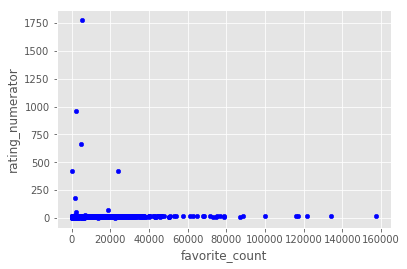

In [29]:
# use scatter plot to show the correlation between favorate_count and rating_numerator
#since all the rating_denominator are 10, we would use the rating_numerator as the rates and favorate_count as the popularity
twitter_dog_rate.plot(kind = 'scatter', x='favorite_count', y='rating_numerator', color='Blue');
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.savefig('Rating VS. Favorite.png',bbox_inches = "tight");

Based on the scatter plot, there is no correlation between the rating_numerator and favorate_count. So the popularity doesn't correlate to the rating fraction.

In [71]:
#the most popular dog information
max_pop = twitter_dog_rate.favorite_count.max()
twitter_dog_rate[twitter_dog_rate.favorite_count == max_pop]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
858,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,13.0,10,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,157447.0,78374.0



<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg" alt="Drawing" style="width:150px;"/>

In [141]:
#the least popular dog information
min_pop = twitter_dog_rate.favorite_count.min()
twitter_dog_rate[twitter_dog_rate.favorite_count == min_pop]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
1108,707983188426153984,2016-03-10 17:35:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),NaN,12,10,None,12.0,10,None,NaN,NaN,NaN,NaN,51.0,2.0


Unfortunately, the least popular dog has no image, and there is no more detailed information about it.

In [142]:
#the highest rate dog information
high_rate = twitter_dog_rate.rating_numerator_new.max()
twitter_dog_rate[twitter_dog_rate.rating_numerator_new == high_rate]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
800,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,1776.0,10,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,NaN,NaN,5173.0,2483.0


<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" alt="Drawing" style="width:200px;"/>

In [144]:
#the lowest rate dog information
low_rate = twitter_dog_rate.rating_numerator_new.min()
twitter_dog_rate[twitter_dog_rate.rating_numerator_new == low_rate]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_stage,jpg_url,img_num,dog_breed,confidence_level,favorite_count,retweet_count
265,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,0.0,10,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3.0,american_staffordshire_terrier,0.012731,22629.0,3044.0
836,746906459439529985,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,0.0,10,None,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1.0,NaN,NaN,2913.0,299.0


<img src="https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg" alt="Drawing" style="width:150px;"/>

<img src="https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg" alt="Drawing" style="width:150px;"/>

The reason why they are lowest rate:   
- For the first one, there are no rate in the text of the tweet which the denominator is 0.   
- For the second one, there are no rate in the text of the tweet which the denominator is 0 ,no photo for the dog and the whole tweet is not the introduction of the dog. The image is just the view picture.   

- we could reassess the dataset again to fiter out those irrelevant tweets and make a more reliable analysis.